## Decision Tree

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("salaries.csv")

In [3]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [13]:
input_=df.drop("salary_more_then_100k",axis=1)
input_

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [7]:
target=df.salary_more_then_100k
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

> As because the data in input dataset is in text format so do LabelEncoding of it

In [10]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()
input_.company=le.fit_transform(input_.company)
input_.job=le.fit_transform(input_.job)
input_.degree=le.fit_transform(input_.degree)
input_

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [27]:
from sklearn import tree

In [28]:
model=tree.DecisionTreeClassifier()

In [29]:
model.fit(input_,target)

DecisionTreeClassifier()

In [30]:
model.predict([[0,2,1]])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Excercise

In [31]:
df=pd.read_csv("titanic.csv")

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


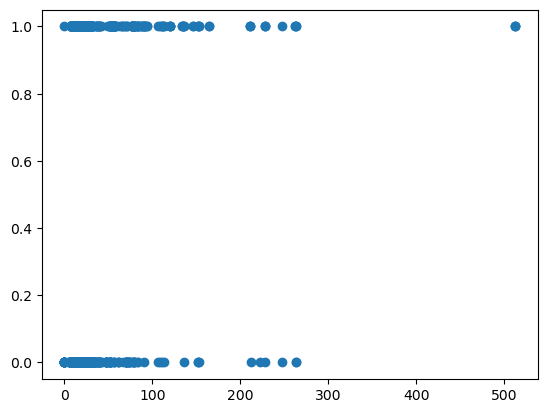

In [36]:
plt.scatter(df.Fare,df.Survived)

In [46]:
input_=df[["Pclass","Sex","Age","Fare"]]
input_=input_.replace(["male","female"],[0,1])
input_

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,NaN,23.4500
889,1,0,26.0,30.0000


In [48]:
target=df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_,target,test_size=0.2)
x_train=x_train.fillna(method="ffill",axis=1)
x_train

,Pclass,Sex,Age,Fare
220,3.0,0.0,16.0,8.0500
14,3.0,1.0,14.0,7.8542
484,1.0,0.0,25.0,91.0792
27,1.0,0.0,19.0,263.0000
654,3.0,1.0,18.0,6.7500
...,...,...,...,...
761,3.0,0.0,41.0,7.1250
280,3.0,0.0,65.0,7.7500
628,3.0,0.0,26.0,7.8958
110,1.0,0.0,47.0,52.0000


In [84]:
from sklearn import tree

In [50]:
model=tree.DecisionTreeClassifier()

In [67]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
model.score(x_train,y_train)

0.9803370786516854

In [85]:
result=model.predict([[1,1,38.0,71.2833]])
if result[0]==0:
    print("Not Survived")
else:
    print("Survived")

Survived


C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
